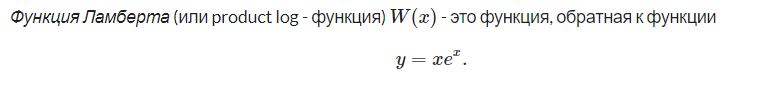

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
from datetime import timedelta
import pandas as pd
import seaborn as sns
import scipy
from scipy.optimize import brentq
from scipy.special import lambertw

In [3]:
def func(x):
    return x * np.exp(x)

1) Постройте график функции x*e^x

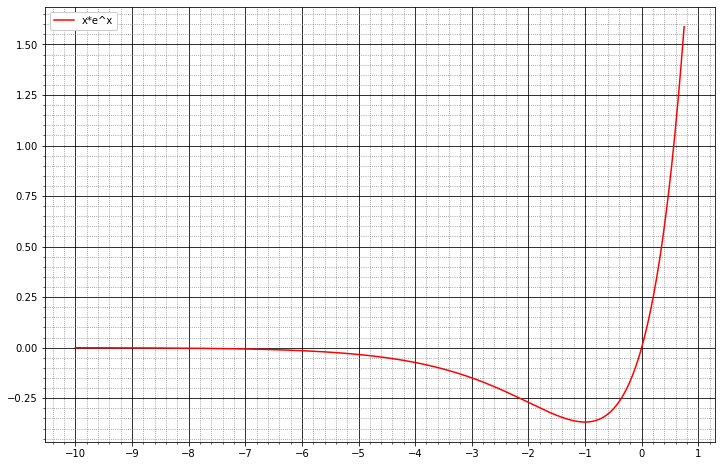

In [4]:
x = np.linspace(-10.0, 0.75, 200)
y = func(x)

fig, ax = plt.subplots()

ax.plot(x, y, 'r', label = 'x*e^x')
ax.legend(loc = 'best', framealpha = 1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.grid(which='major', color = 'k')
ax.minorticks_on()
ax.grid(which='minor', color = 'gray', linestyle = ':')

fig.set_figwidth(12)
fig.set_figheight(8)

2) Постройте график обратной функции поменяв местами массивы x, y при построении.

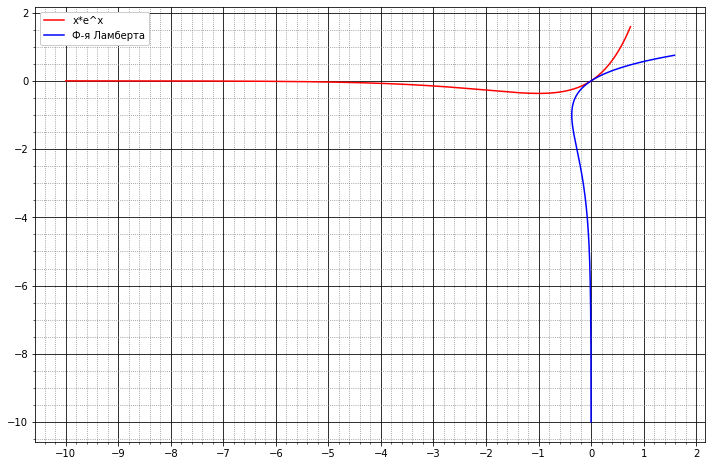

In [5]:
fig, ax = plt.subplots()

ax.plot(x, y, 'r', label = 'x*e^x')
ax.plot(y, x, 'b', label = 'Ф-я Ламберта')
ax.legend(loc = 'best', framealpha = 1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.grid(which='major', color = 'k')
ax.minorticks_on()
ax.grid(which='minor', color = 'gray', linestyle = ':')

fig.set_figwidth(12)
fig.set_figheight(8)

Мы видим, что функция Ламберта - многозначная. В области вещественных чисел у нее две ветви (и счетное число ветвей, если рассматривать комплекснозначные функции комплексного аргумента):\
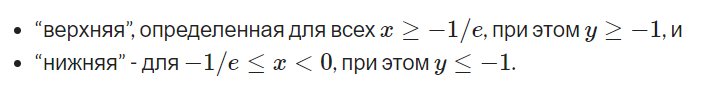\
3) Изобразите своим цветом каждую из этих ветвей.

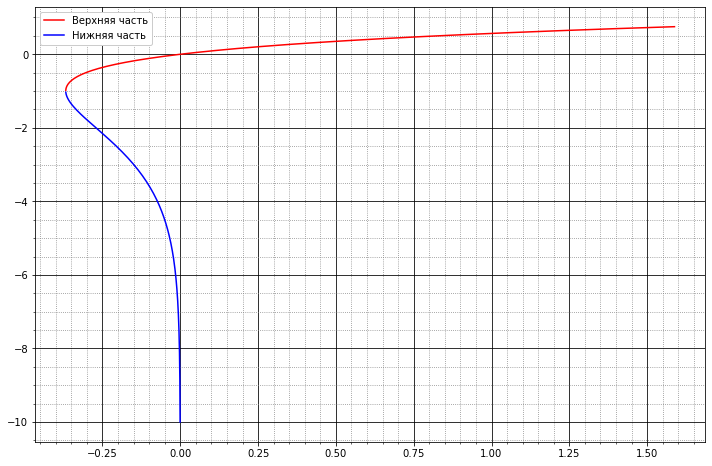

In [6]:
x_upper = []
x_lower = []
y_upper = []
y_lower = []

for idx in range(len(x)):
    if x[idx] <= -1.0:
        x_lower.append(y[idx])
        y_lower.append(x[idx])
    elif x[idx] >= -1.0:
        x_upper.append(y[idx])
        y_upper.append(x[idx])


fig, ax = plt.subplots()

ax.plot(x_upper, y_upper, 'r', label = 'Верхняя часть')
ax.plot(x_lower, y_lower, 'b', label = 'Нижняя часть')
ax.legend(loc = 'best', framealpha = 1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.grid(which='major', color = 'k')
ax.minorticks_on()
ax.grid(which='minor', color = 'gray', linestyle = ':')

fig.set_figwidth(12)
fig.set_figheight(8)

Функцию Ламберта можно вычислить с помощью функции scipy.special.lambertw:

lambertw(x, k=0) дает значения для “верхней” ветви (по умолчанию);\
lambertw(x, k=-1) дает значения для “нижней” ветви.

Вычисления этой функции могут быть не очень точны вблизи точки x0 = −1/e. В частности, график этой функции можно нарисовать с помощью lambertw(x), но они получаются не такими аккуратными, как были построены выше.

c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


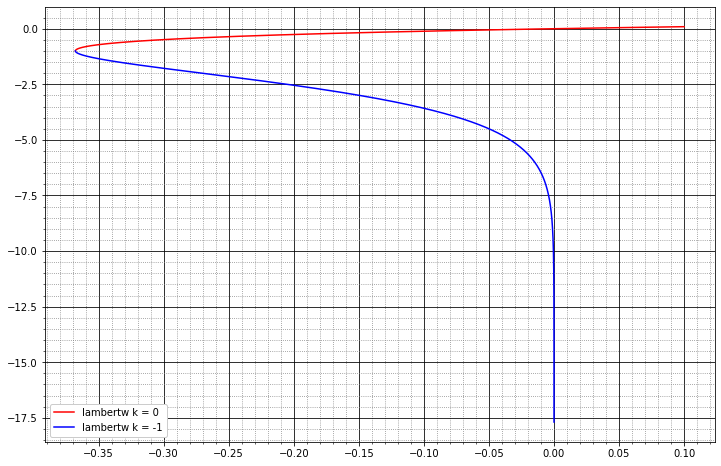

In [7]:
x_upper = np.linspace(-1/np.exp(1), 0.1, 1000000)
x_lower = np.linspace(-1/np.exp(1), 0.0, 1000000)

y_upper = scipy.special.lambertw(x_upper, k = 0)
y_lower = scipy.special.lambertw(x_lower, k = -1)
fig, ax = plt.subplots()

ax.plot(x_upper, y_upper, 'r', label = 'lambertw k = 0')
ax.plot(x_lower, y_lower, 'b', label = 'lambertw k = -1')
ax.legend(loc = 'best', framealpha = 1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax.grid(which='major', color = 'k')
ax.minorticks_on()
ax.grid(which='minor', color = 'gray', linestyle = ':')

fig.set_figwidth(12)
fig.set_figheight(8)

Например для таких значений:

lambertw(-np.exp(-1))\
lambertw(-np.exp(-1)+1e-6)\
lambertw(-np.exp(-1), k=-1)\
lambertw(-np.exp(-1)+1e-6, k=-1)\

In [8]:
print(lambertw(-np.exp(-1)))
print(lambertw(-np.exp(-1)+1e-6))
print(lambertw(-np.exp(-1),      k=-1))
print(lambertw(-np.exp(-1)+1e-6, k=-1))

(nan+nanj)
(-0.9976701662721043+0j)
(nan+nanj)
(-1.0023334581084755+0j)


Написать свою функцию mylambert(x, k, tol), вычисляющую значение функции Ламберта. Функция должна решать уравнение (1), используя scipy.optimize.brentq. Можете воспользоваться другим методом. Обоснуйте свой выбор.

In [31]:
exp = np.exp(1)

# Получилось реализовать вычисление только верхней ветки
def mylambert(x, k=0, tol=1e-12):
    W = lambda y: y*np.exp(y) - x
    if k == 0: #  >= -1/exp
        x = brentq(W, -1., 100000, xtol = tol)
        return x
    elif k == -1: # X < 0
        x = brentq(W, -10000, -1., xtol = tol)
        return x
    else:
        raise Exception

C:\Users\Sokol\AppData\Local\Temp/ipykernel_17500/650135223.py:5: RuntimeWarning: overflow encountered in exp
  W = lambda y: y*np.exp(y) - x


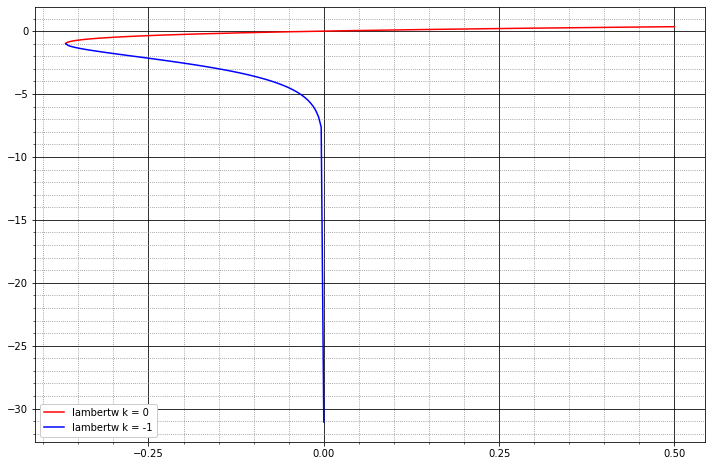

In [32]:
x_upper = np.linspace(-1/np.exp(1), 0.5, 1000)
x_lower = np.linspace(-1/np.exp(1), -1e-12, 100)

y_upper = []
y_lower = []
for idx in range(len(x_upper)):
    y_upper.append(mylambert(x_upper[idx], 0))

for idx in range(len(x_lower)):
    y_lower.append(mylambert(x_lower[idx], -1))

fig, ax = plt.subplots()

ax.plot(x_upper, y_upper, 'r', label = 'lambertw k = 0')
ax.plot(x_lower, y_lower, 'b', label = 'lambertw k = -1')
ax.legend(loc = 'best', framealpha = 1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.grid(which='major', color = 'k')
ax.minorticks_on()
ax.grid(which='minor', color = 'gray', linestyle = ':')

fig.set_figwidth(12)
fig.set_figheight(8)


Сравнить mylambert(x, k, tol) и lambertw(x, k, tol) по точности и скорости работы.

In [36]:
print(lambertw(-np.exp(-1)+1e-6).real)
print(mylambert(-np.exp(-1)+1e-6))

print("ABS Error = "+str(np.abs(lambertw(-np.exp(-1)+1e-6) - mylambert(-np.exp(-1)+1e-6))))

print(lambertw(-np.exp(-1)).real)
print(mylambert(-np.exp(-1)))

-0.9976701662721043
-0.9976701662720687
ABS Error = 3.552713678800501e-14
nan
-1.0


C:\Users\Sokol\AppData\Local\Temp/ipykernel_17500/650135223.py:5: RuntimeWarning: overflow encountered in exp
  W = lambda y: y*np.exp(y) - x


Можно заметить, что в точке `-np.exp(-1)` функция `lambertw` не может вычислить значение функции, в то время как `mylambert` может.

В точке `-np.exp(-1)+1e-6` точность сильно не различается.

In [41]:
import time
start_time = time.time()
for _ in range(1000):
    lambertw(-np.exp(-1)+1e-6)
print(" lambertw: %s seconds " % (time.time() - start_time))

start_time = time.time()
for _ in range(1000):
    mylambert(-np.exp(-1)+1e-6)
print(" mylambert: %s seconds " % (time.time() - start_time))

 lambertw: 0.00799107551574707 seconds 
 mylambert: 0.10630202293395996 seconds 


C:\Users\Sokol\AppData\Local\Temp/ipykernel_17500/650135223.py:5: RuntimeWarning: overflow encountered in exp
  W = lambda y: y*np.exp(y) - x


Из за алгоритма `scipy.optimize.brentq` функция `mylambert` выполняется гораздо дольше, чем `lambertw`.